In [32]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from sklearn.model_selection import GridSearchCV
import cv2
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Load The Data

In [33]:
train_data = pd.DataFrame({'file': os.listdir(r"C:\Users\reBuyTech\Desktop\prodigy_intern\PRODIGY_ML_03\train\train")})
print(train_data.head())

           file
0     cat.0.jpg
1     cat.1.jpg
2    cat.10.jpg
3   cat.100.jpg
4  cat.1000.jpg


# some samples

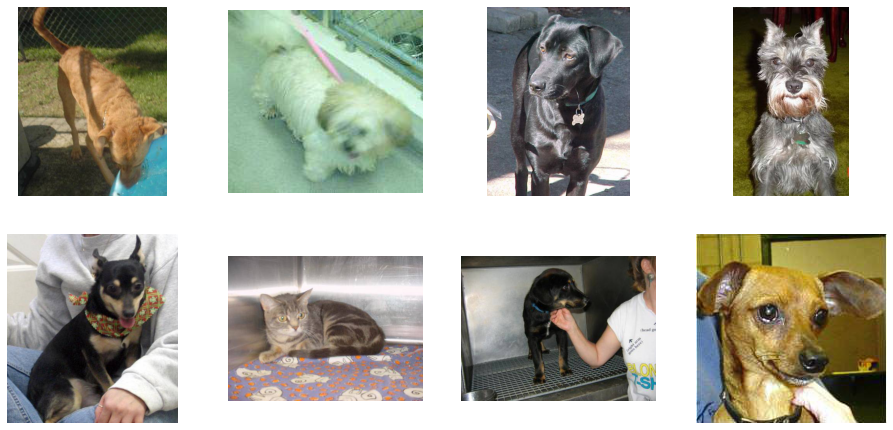

In [35]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(16,16))

images = os.listdir(r"C:\Users\reBuyTech\Desktop\prodigy_intern\PRODIGY_ML_03\train\train")
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join(r"C:\Users\reBuyTech\Desktop\prodigy_intern\PRODIGY_ML_03\train\train", img)) 
    fig.imshow(img) 

In [45]:
train_images = os.listdir(r"C:\Users\reBuyTech\Desktop\prodigy_intern\PRODIGY_ML_03\train\train")
features = []
labels = []
image_size = (50, 50)

for image in tqdm(train_images, desc="Processing Train Images"):
    if image[0:3] == 'cat' :
        label = 0
    else :
        label = 1
    image_read = cv2.imread(r"C:\Users\reBuyTech\Desktop\prodigy_intern\PRODIGY_ML_03\train\train"+"/"+image)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)
    
features = np.array(features)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

Processing Train Images: 100%|██████████████████████████████████████████████████| 25000/25000 [01:18<00:00, 319.14it/s]


In [46]:
n_components = 0.8
pca = PCA(n_components=n_components)
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])

In [47]:
param_grid = {
    'pca__n_components': [2, 1, 0.9, 0.8],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

In [48]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=4)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END pca__n_components=2, svm__kernel=linear;, score=0.528 total time=  23.8s
[CV 2/3] END pca__n_components=2, svm__kernel=linear;, score=0.525 total time=  24.0s
[CV 3/3] END pca__n_components=2, svm__kernel=linear;, score=0.537 total time=  24.0s
[CV 1/3] END pca__n_components=2, svm__kernel=rbf;, score=0.570 total time=  20.2s
[CV 2/3] END pca__n_components=2, svm__kernel=rbf;, score=0.560 total time=  20.1s
[CV 3/3] END pca__n_components=2, svm__kernel=rbf;, score=0.564 total time=  20.5s
[CV 1/3] END pca__n_components=2, svm__kernel=poly;, score=0.504 total time=  14.0s
[CV 2/3] END pca__n_components=2, svm__kernel=poly;, score=0.486 total time=  13.7s
[CV 3/3] END pca__n_components=2, svm__kernel=poly;, score=0.492 total time=  13.3s
[CV 1/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.507 total time=  12.1s
[CV 2/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.495 total time=  12.1s
[CV 3/

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=0.8, random_state=42)),
                                       ('svm', SVC())]),
             param_grid={'pca__n_components': [2, 1, 0.9, 0.8],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=4)

In [49]:
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'pca__n_components': 0.9, 'svm__kernel': 'rbf'}
Best Score:  0.6738502183801701


# Model accuracy

In [50]:
accuracy = best_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6846


In [51]:
y_pred = best_pipeline.predict(X_test)
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.69      0.69      0.69      2515
         Dog       0.68      0.68      0.68      2485

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



#  Confusion matrix

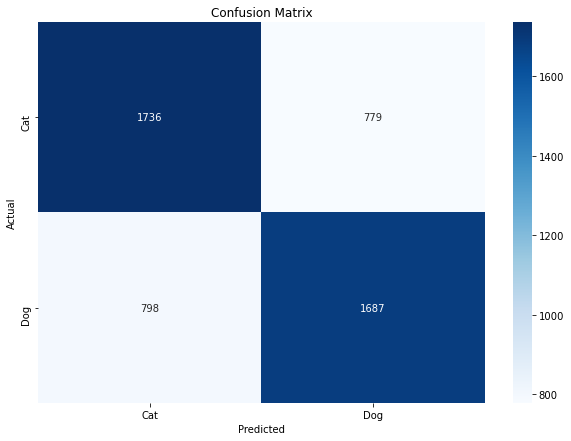

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# PCA explained variance ratio

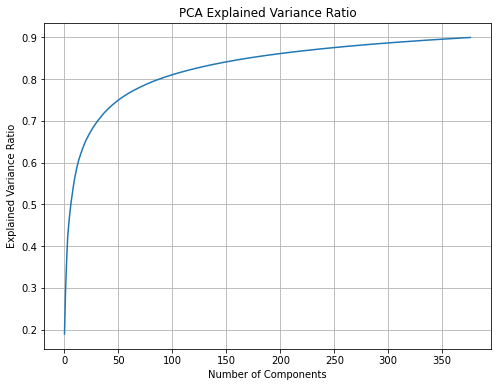

In [55]:
pca = best_pipeline.named_steps['pca']
pca_explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.grid()
plt.show()